In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import Data
df = pd.read_csv("/Users/myeongseop.kim/competition-by-AI/bert_csv/bert_tokenizing_6_6.csv")
df = df.drop(["Unnamed: 0"], axis=1)

In [3]:
# Drop Errors and NAN values
df = df[df['turn_over_rate']<1]
error_firm = ['동원홈푸드','휠라홀딩스','트리','와디즈','키위컴퍼니','줌인터넷','시선인터내셔널','브이티코스메틱','유니슨이테크','씨엠비대전방송','서울비젼','더메인즈','조은시스템']

for i in error_firm:
    df = df[df.company_name != i]

# Rename the columns
df = df.rename(columns={"average_salary":"average_salary(만원)", "total_sale":"total_sale(억원)"})


In [4]:
df

,company_name,adv topic0,adv topic1,adv topic2,adv topic3,adv topic4,dadv topic0,dadv topic1,dadv topic2,dadv topic3,dadv topic4,average_salary(만원),total_sale(억원),turn_over_rate
0,국민건강보험공단,3.399543e-307,3.580304e-307,1.000000e+00,2.684114e-307,5.633498e-308,9.544222e-01,2.456852e-02,7.255166e-03,6.851110e-03,6.902963e-03,6441.0,75400.0,0.20
1,근로복지공단,1.229551e-01,1.634333e-01,2.176075e-01,5.414207e-02,1.315550e-02,5.705738e-01,3.675878e-02,9.084808e-03,8.080394e-03,8.035949e-03,5817.0,9406.2,0.13
2,농협은행,6.942124e-01,5.968145e-02,2.000383e-02,9.830449e-03,3.798602e-03,1.000000e+00,9.409707e-308,2.546828e-308,2.326638e-308,2.347725e-308,6182.0,13100.0,0.15
3,현대카드,1.193514e-01,4.770708e-01,1.091539e-01,3.496749e-02,7.680055e-03,1.096432e-306,1.000000e+00,1.289215e-307,9.234105e-308,8.671962e-308,8737.0,2300.0,0.35
4,중소기업은행,1.394933e-01,1.847792e-01,3.359049e-01,8.368570e-02,1.728357e-02,8.984879e-01,5.493201e-02,1.303355e-02,1.141155e-02,1.161808e-02,10065.0,14800.0,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,플레이스엠,6.859702e-01,1.563688e-01,3.554223e-02,1.777679e-02,5.975312e-03,7.578022e-01,1.951679e-02,5.525451e-03,5.132116e-03,5.172930e-03,3964.0,165.7,0.45
2496,서울신용평가정보,1.280965e-01,1.262929e-01,1.770907e-01,1.566355e-01,3.440185e-02,1.451637e-01,6.406215e-02,6.024296e-02,3.909027e-01,7.100763e-02,3878.0,466.7,0.54
2498,유끼커뮤니케이션,2.599332e-307,2.102161e-307,1.944933e-307,1.552552e-307,1.000000e+00,5.814629e-307,2.585482e-307,2.951758e-307,1.000000e+00,4.103128e-307,4417.0,28.0,0.14
2501,에이치엔씨네트워크,1.015840e-01,1.167899e-01,5.099756e-01,8.804697e-02,1.745647e-02,2.226268e-01,1.467473e-01,2.241219e-01,8.628666e-02,7.279908e-02,3038.0,336.9,0.68


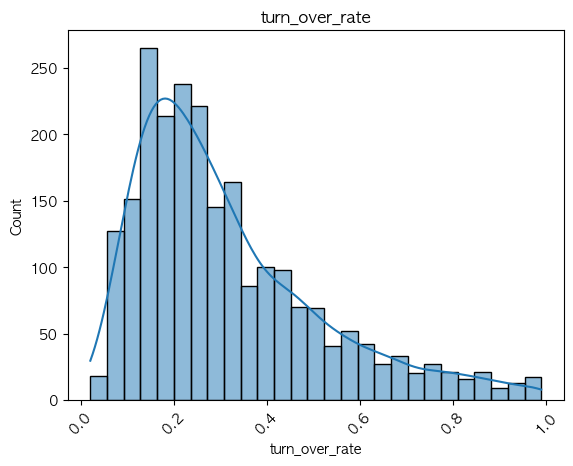

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc

# for Mac
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# Get turn_over_rate graphs

plt.title('turn_over_rate')
plt.xticks(rotation = 45)
sns.histplot(df['turn_over_rate'],kde=True)
plt.show()

In [6]:
df.columns[1:10]

Index(['adv topic0', 'adv topic1', 'adv topic2', 'adv topic3', 'adv topic4',
       'dadv topic0', 'dadv topic1', 'dadv topic2', 'dadv topic3'],
      dtype='object')

In [7]:
adv_list = df.columns[1:10]
adv_col = 5
dadv_list = df.columns[10:-3]
dadv_col = 5
fv_list = df.columns[-3:-1]
fv_col = 1

def graphing_data (col, num):
    plt.figure(figsize=(24,12))
    for i, title in enumerate(col):
        plt.subplot(2,num,i+1)
        plt.title(title+" scatter plot")
        sns.scatterplot(x= df[title].astype(float), y = df['turn_over_rate'])

    # if col[0][-1].isdigit():
    #     if col[0][0] == 'a':
    #         plt.savefig('Advatage_topic_modeling_scatter_plot.png')
    #     if col[0][0] == 'd':
    #         plt.savefig('Disadvatage_topic_modeling_scatter_plot.png')
    # else:
    #     plt.savefig('Financial_variable_scatter_plot.png')
    plt.show()

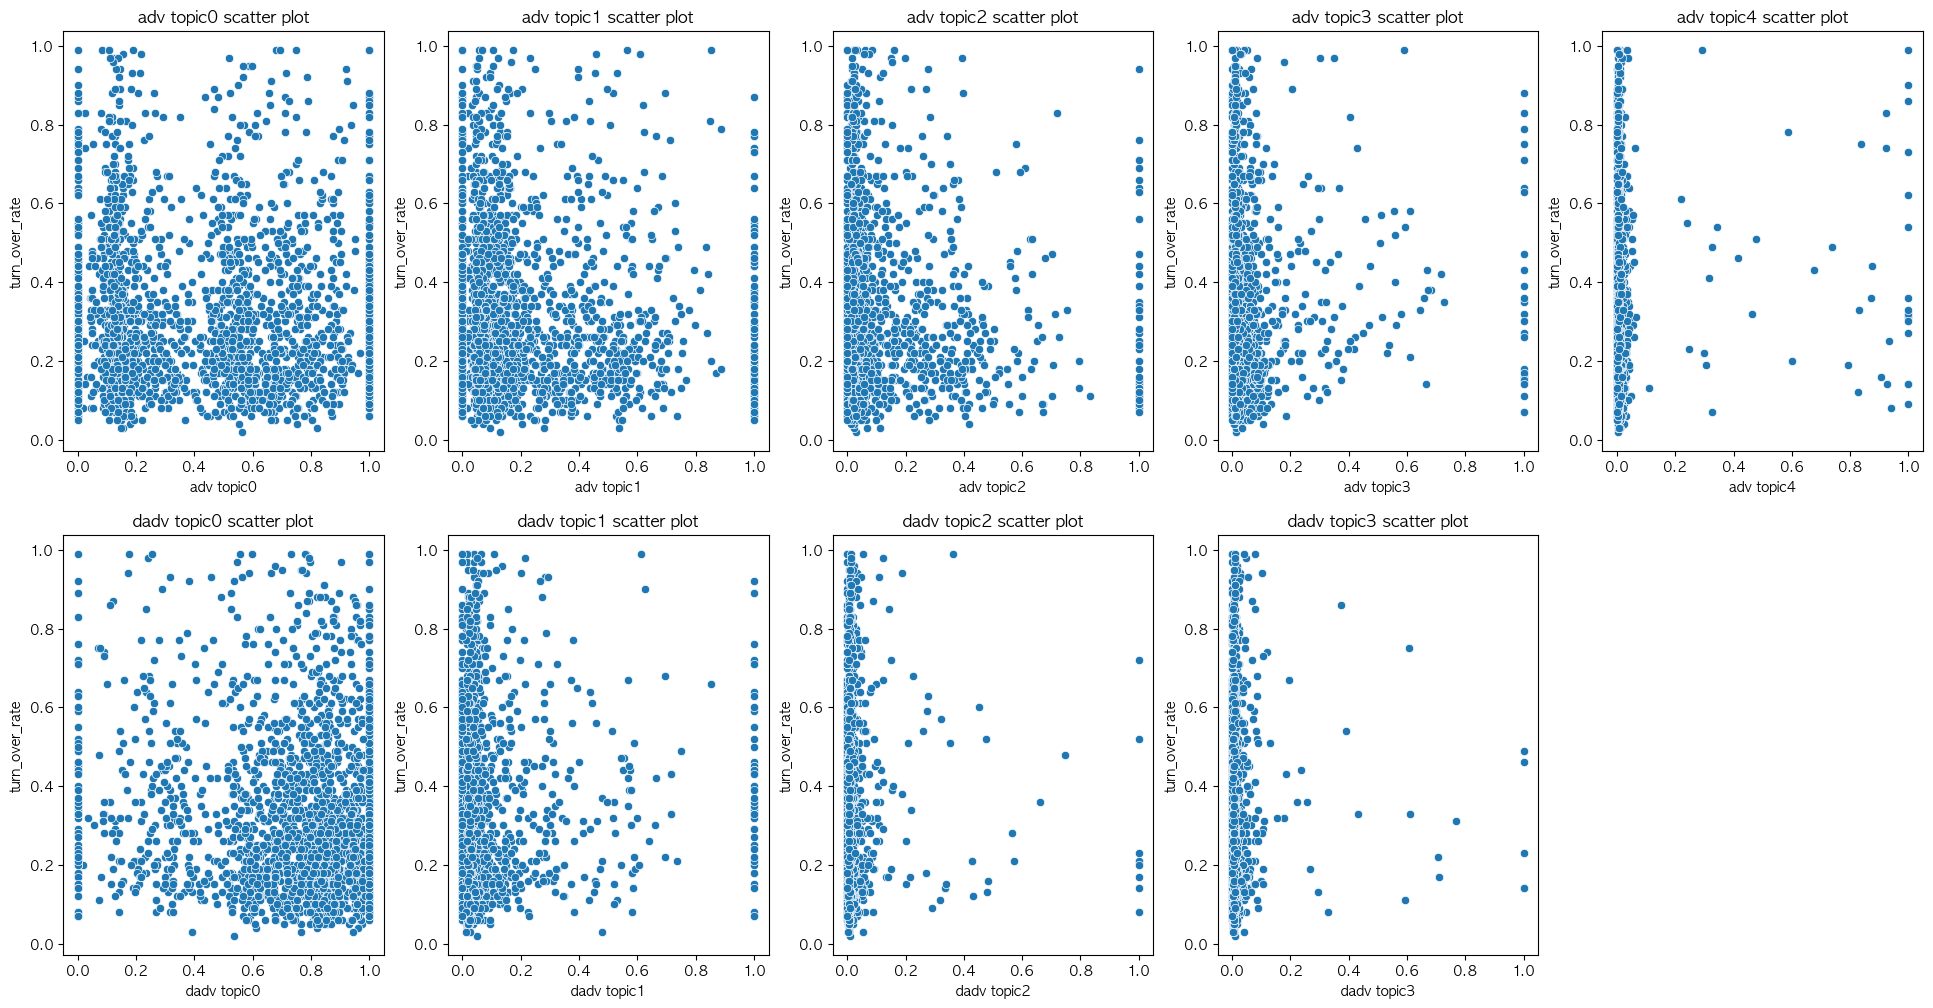

In [8]:
graphing_data(adv_list, adv_col)

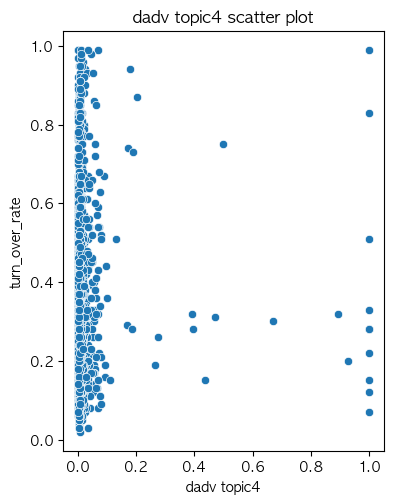

In [9]:
graphing_data(dadv_list,dadv_col)

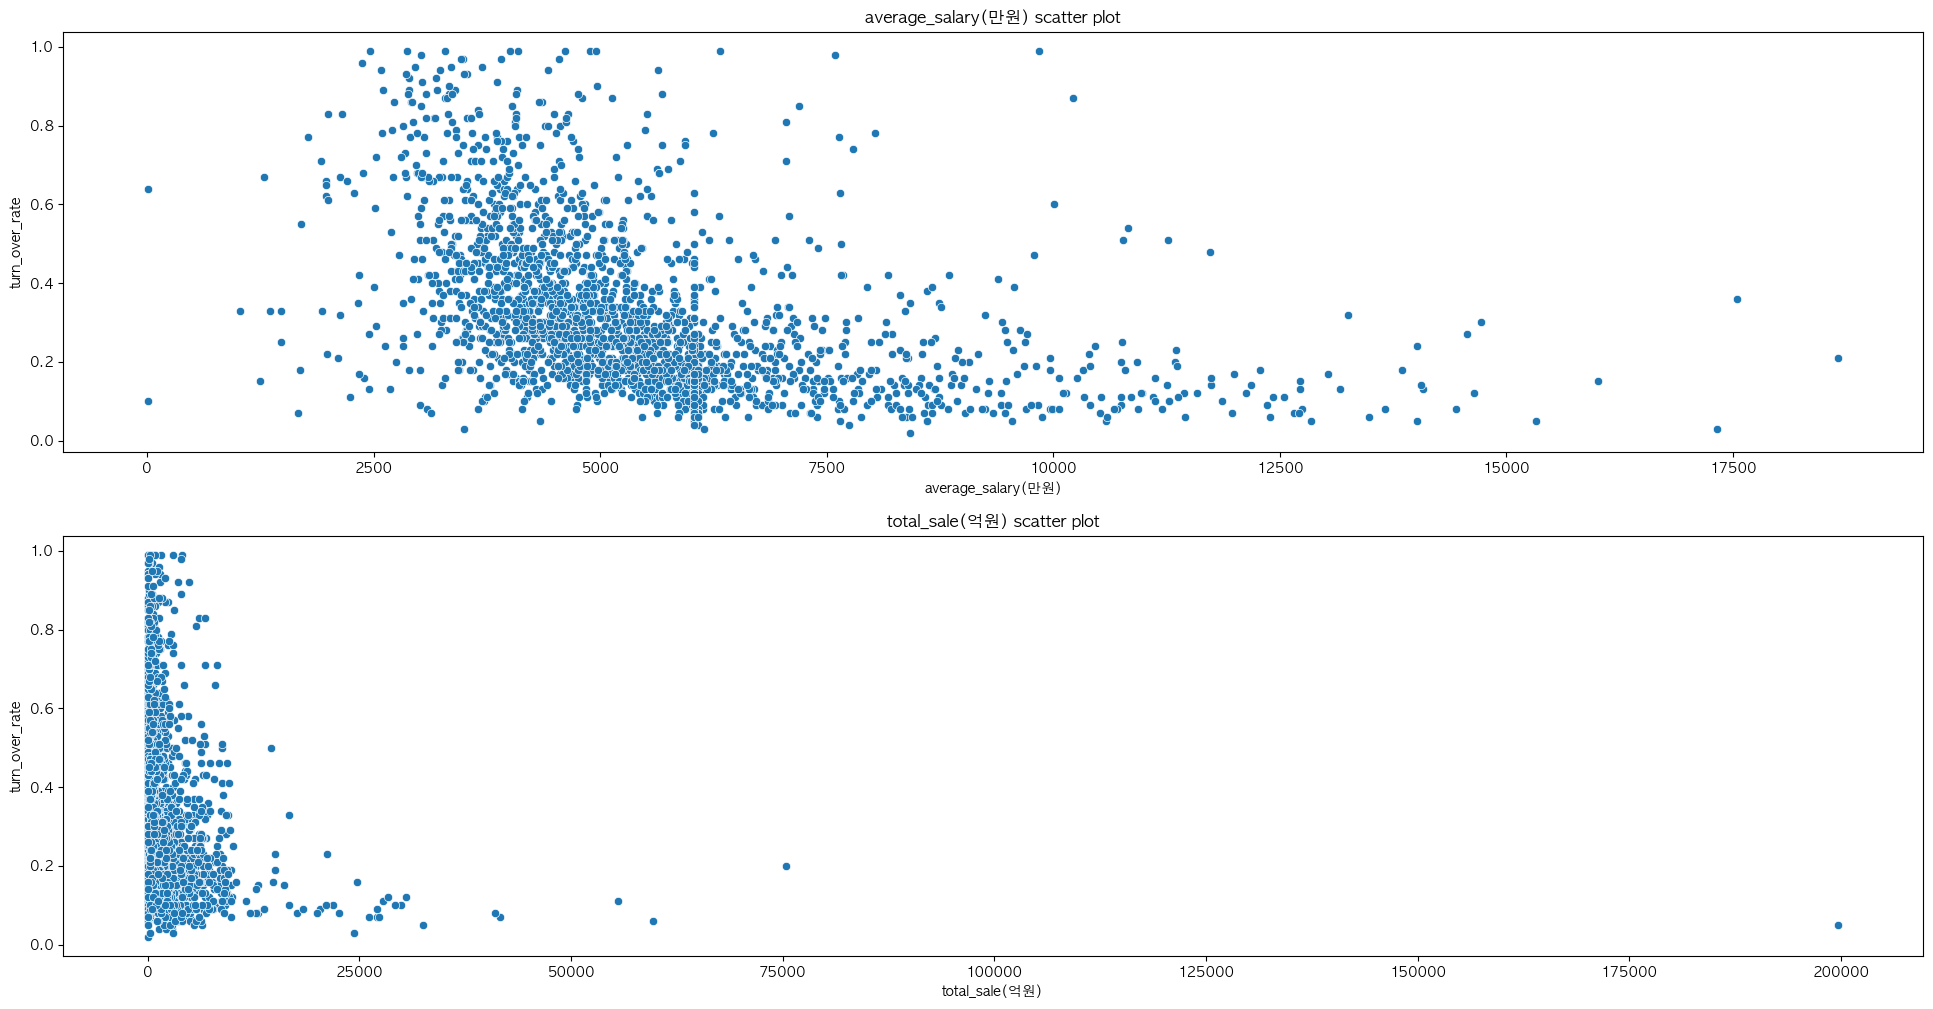

In [10]:
graphing_data(fv_list,fv_col)

**Machine Learning**

Linear, Ridge, Lasso

In [11]:
def get_rmse(model):
    pred = model.predict(X_test.astype(float))
    mse = mean_squared_error(y_test.astype(float), pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, ' RMSE: ', np.round(rmse,3))
    return rmse

In [12]:
def get_mae(model):
    pred = model.predict(X_test.astype(float))
    score = mean_absolute_error(y_test.astype(float),pred)
    print(model.__class__.__name__, " MAE: ", np.round(score,3))

In [13]:
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        # rmses.append(rmse)
    # return rmses

In [14]:
def get_maes(models):
    scores = []
    for model in models:
        score = get_mae(model)
        # scores.append(score)
    # return scores

In [15]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_target = df['turn_over_rate']
x_data = df.drop(['company_name','turn_over_rate'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.1, random_state = 7)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
print('\n')
get_maes(models)

LinearRegression  RMSE:  0.172
Ridge  RMSE:  0.173
Lasso  RMSE:  0.172


LinearRegression  MAE:  0.138
Ridge  MAE:  0.138
Lasso  MAE:  0.138


In [16]:
def get_top_bottom_coef(model, n=4):

    coef = pd.Series(model.coef_, index=x_data.columns)

    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)

    return coef_high, coef_low

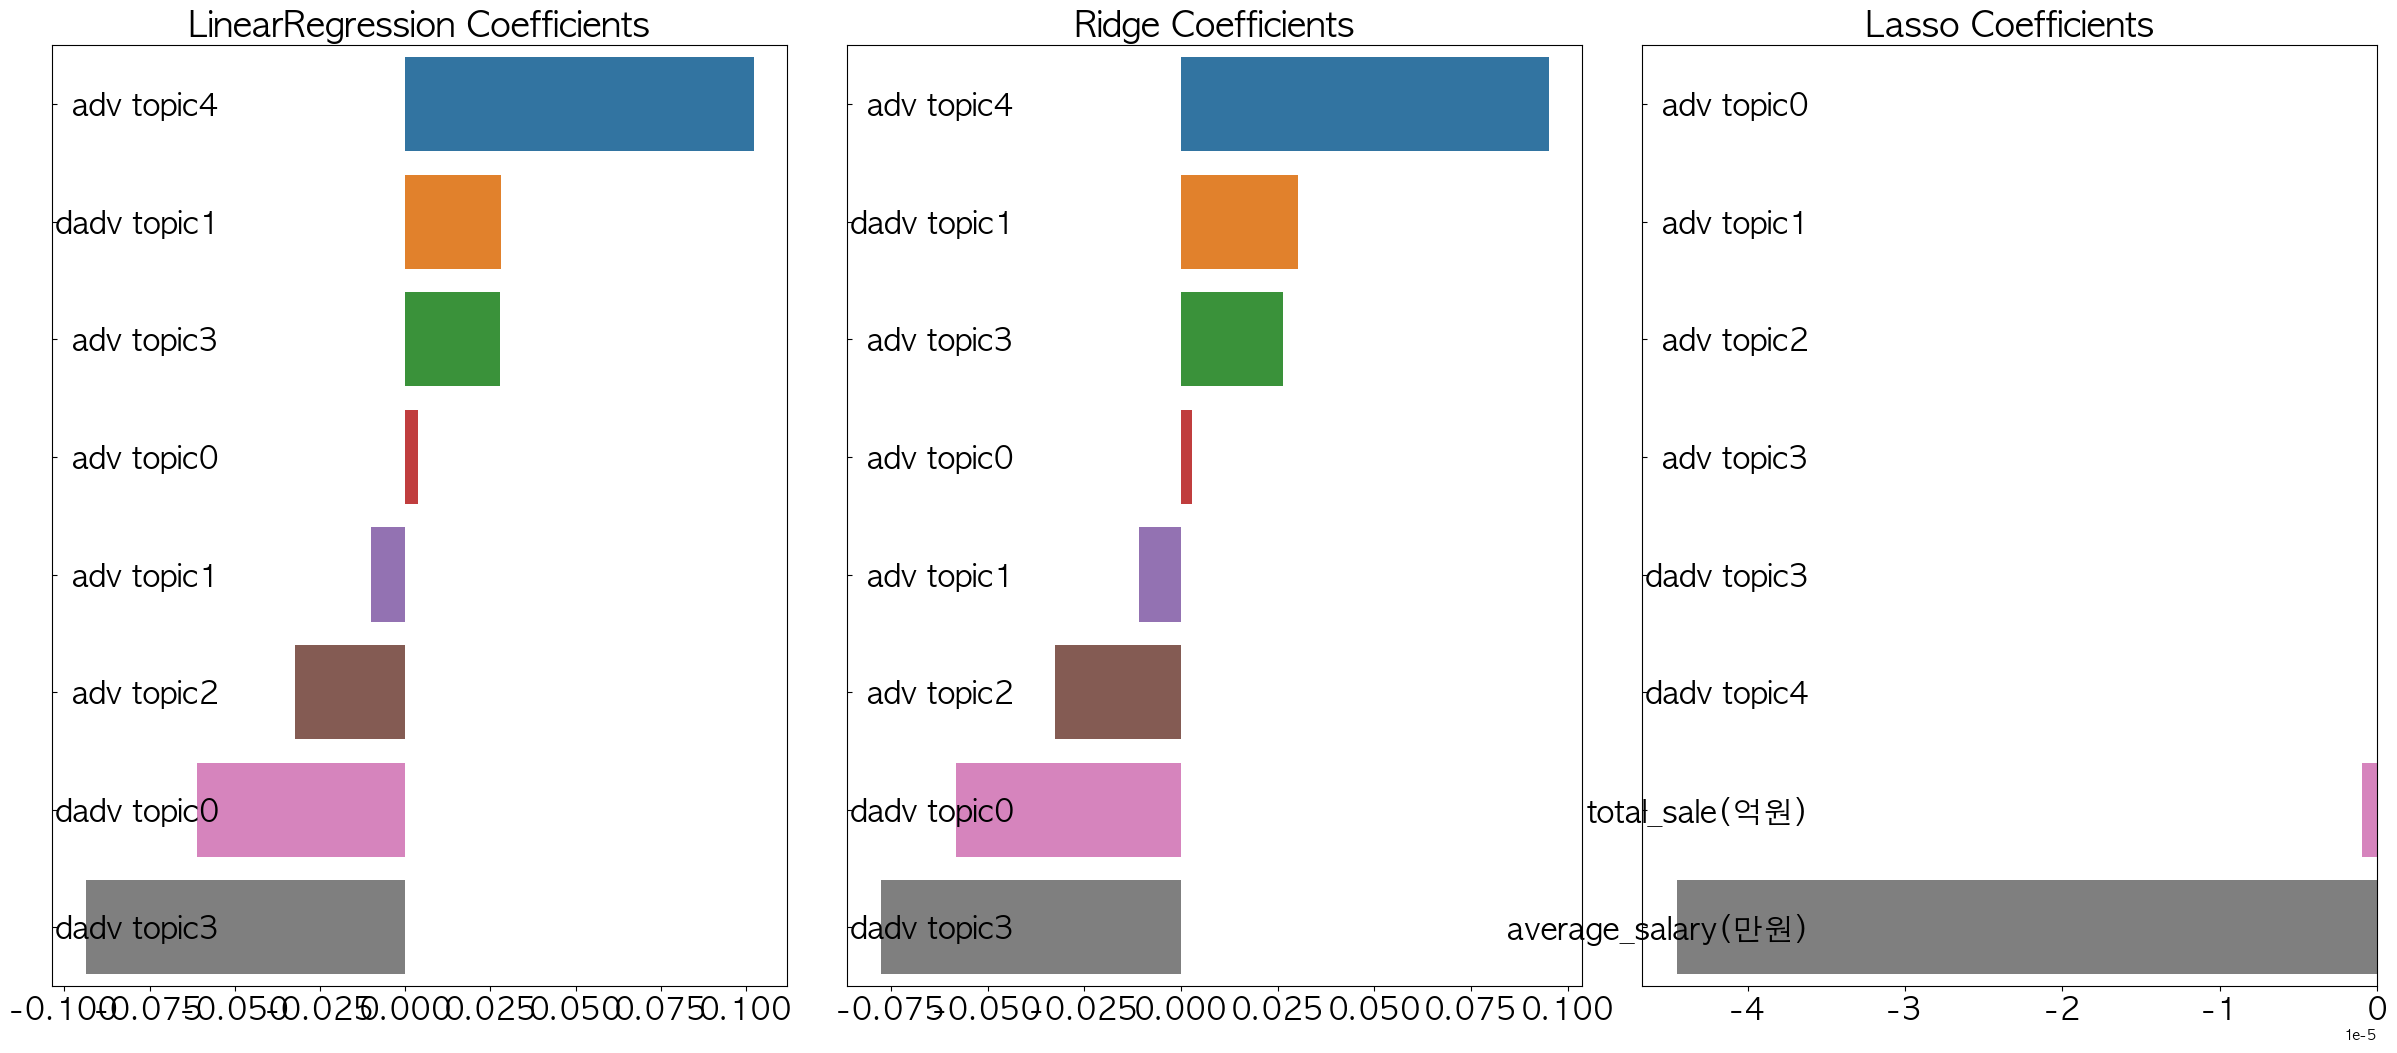

In [17]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize = (24,10), nrows = 1, ncols= 3)
    fig.tight_layout()

    for i_num, model in enumerate(models):

        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])

        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=25)
        axs[i_num].tick_params(axis="y", direction="in",pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax = axs[i_num])

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [18]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):

    for model in models:

        rmse_list = np.sqrt(-cross_val_score(model, x_data, y_target,
                                             scoring= 'neg_mean_squared_error', cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE Value List: {1}'.format(model.__class__.__name__, np.round(rmse_list,3)))
        print('\n{0} CV average RMSE Value List: {1}'.format(model.__class__.__name__, np.round(rmse_avg,3)))

models = [ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


Ridge CV RMSE Value List: [0.172 0.185 0.164 0.179 0.202]

Ridge CV average RMSE Value List: 0.18

Lasso CV RMSE Value List: [0.173 0.185 0.164 0.181 0.202]

Lasso CV average RMSE Value List: 0.181


In [19]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):

    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train.astype(float),y_train.astype(float))
    mse = -1 * grid_model.best_score_
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} After 5 CV, best average MSE: {1}, best average RMSE: {2}, best alpha: {3}'.format(model.__class__.__name__,np.round(mse,4),
                                                                           np.round(rmse,4),grid_model.best_params_))
    print('\n')     


def save_best_params(model, params):

    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train.astype(float),y_train.astype(float))
    mse = -1 * grid_model.best_score_
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} After 5 CV, best average MSE: {1}, best average RMSE: {2}, best alpha: {3}'.format(model.__class__.__name__,np.round(mse,4),
                                                                           np.round(rmse,4),grid_model.best_params_))
    print('\n')     

    return grid_model.best_params_

    

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge After 5 CV, best average MSE: 0.0325, best average RMSE: 0.1802, best alpha: {'alpha': 20}


Lasso After 5 CV, best average MSE: 0.0325, best average RMSE: 0.1803, best alpha: {'alpha': 0.001}




LinearRegression  RMSE:  0.172
Ridge  RMSE:  0.173
Lasso  RMSE:  0.172


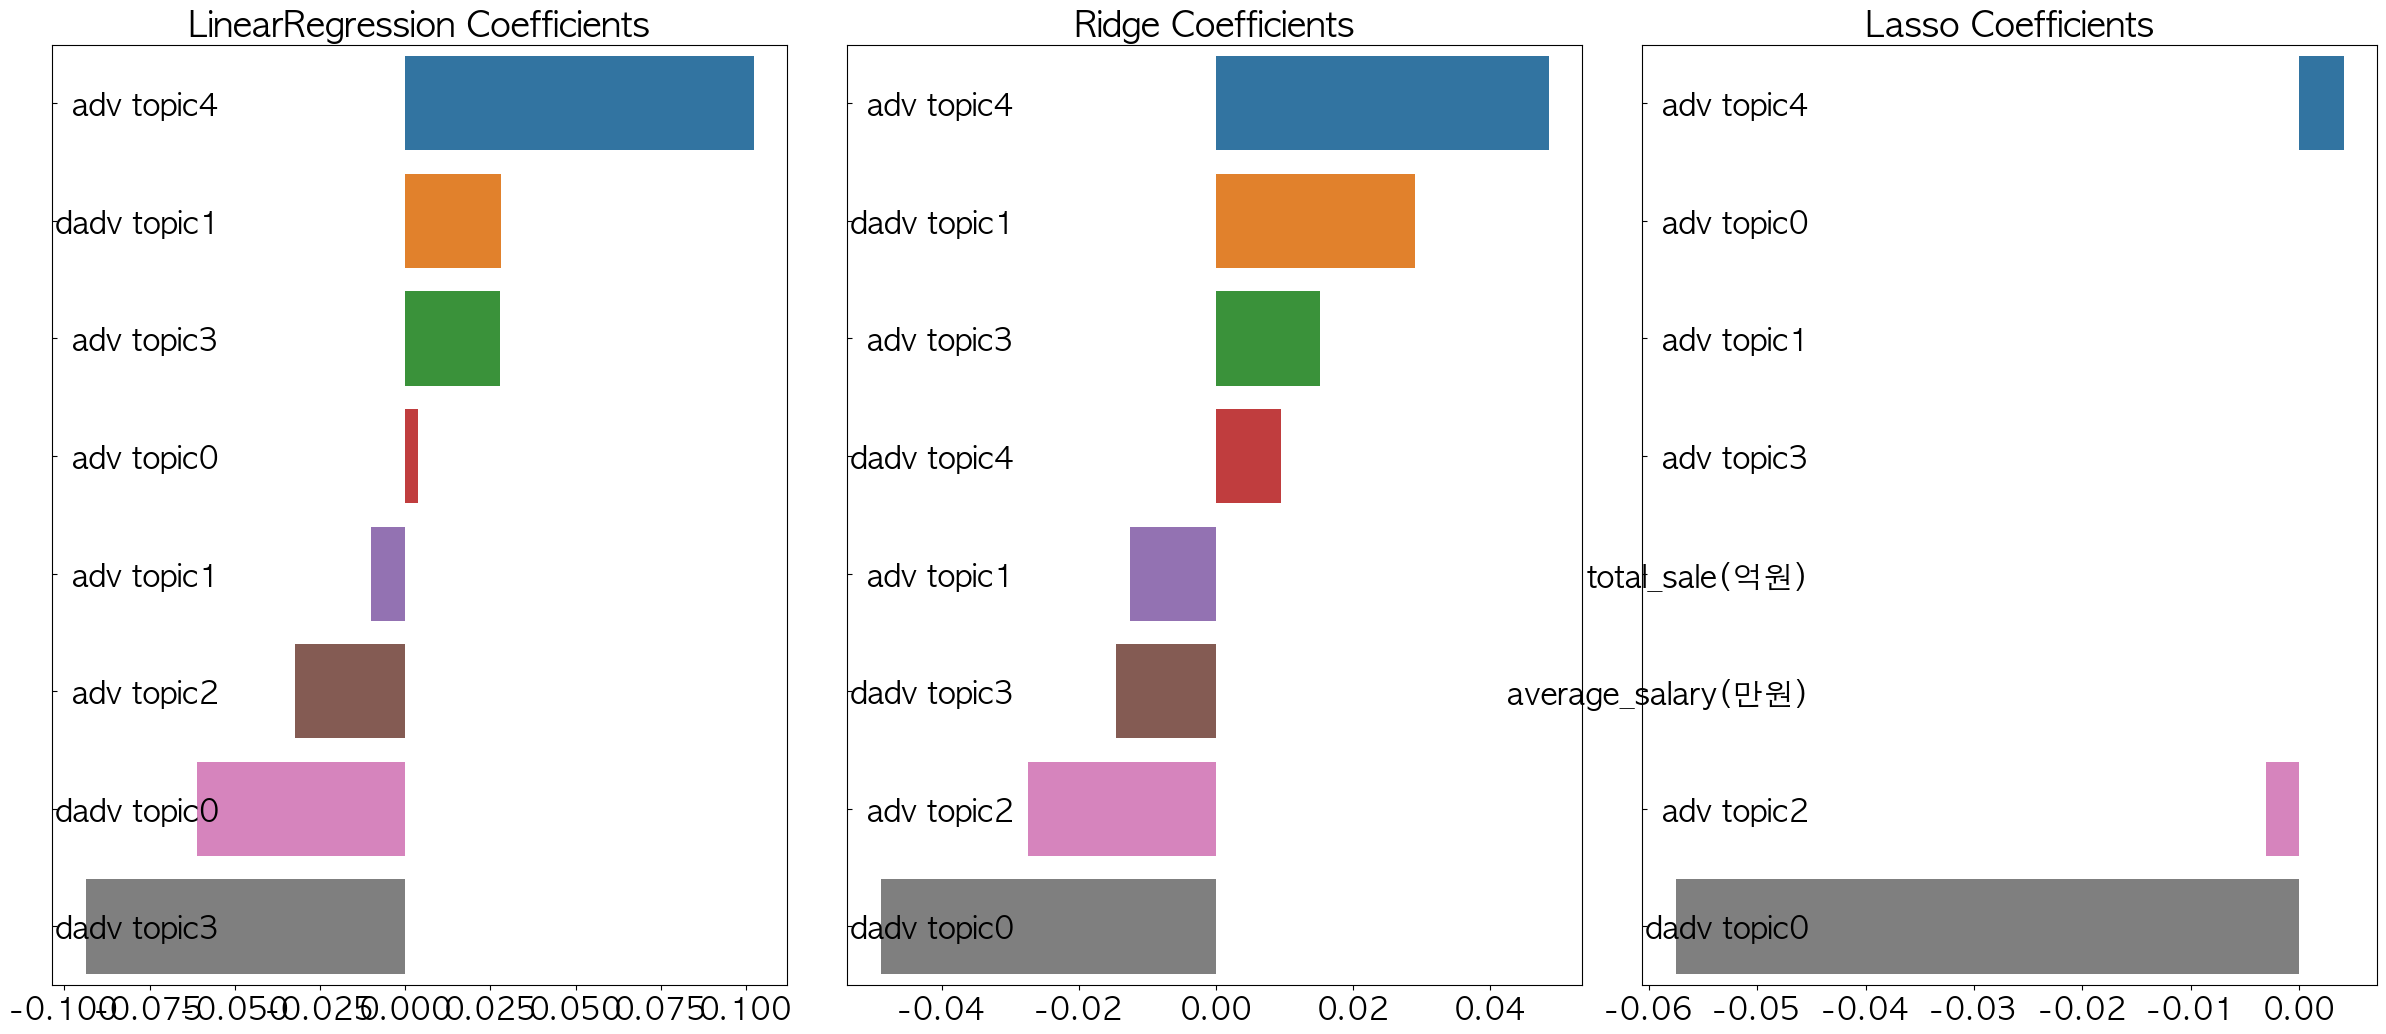

In [20]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

visualize_coefficient(models)

In [21]:
# Finding Skewed Feature
from scipy.stats import skew

feature_index = df.dtypes[df.dtypes != 'object'].index

skew_features = df[feature_index].apply(lambda x: skew(x))

skew_feature_top = skew_features[skew_features > 1]
print(skew_feature_top.sort_values(ascending=False))

total_sale(억원)        20.122063
dadv topic3           12.434577
dadv topic4           11.494746
dadv topic2           10.211705
adv topic4             7.943283
adv topic3             5.545935
dadv topic1            4.193336
adv topic2             3.253489
adv topic1             1.816113
average_salary(만원)     1.804789
turn_over_rate         1.203779
dtype: float64


In [22]:
# log transformation for skewed values
for feature in skew_feature_top.index:
    nonzero_indices = df[feature] != 0  # 0이 아닌 값의 인덱스를 찾음
    addup = min(df[nonzero_indices][feature])
    df[feature] = np.log1p(df[feature]+addup)

In [23]:
y_target = df['turn_over_rate']
x_data = df.drop(['company_name','turn_over_rate'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.1, random_state = 7)

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge After 5 CV, best average MSE: 0.0157, best average RMSE: 0.1255, best alpha: {'alpha': 20}


Lasso After 5 CV, best average MSE: 0.0159, best average RMSE: 0.126, best alpha: {'alpha': 0.001}




LinearRegression  RMSE:  0.117
Ridge  RMSE:  0.117
Lasso  RMSE:  0.117


LinearRegression  MAE:  0.093
Ridge  MAE:  0.093
Lasso  MAE:  0.093


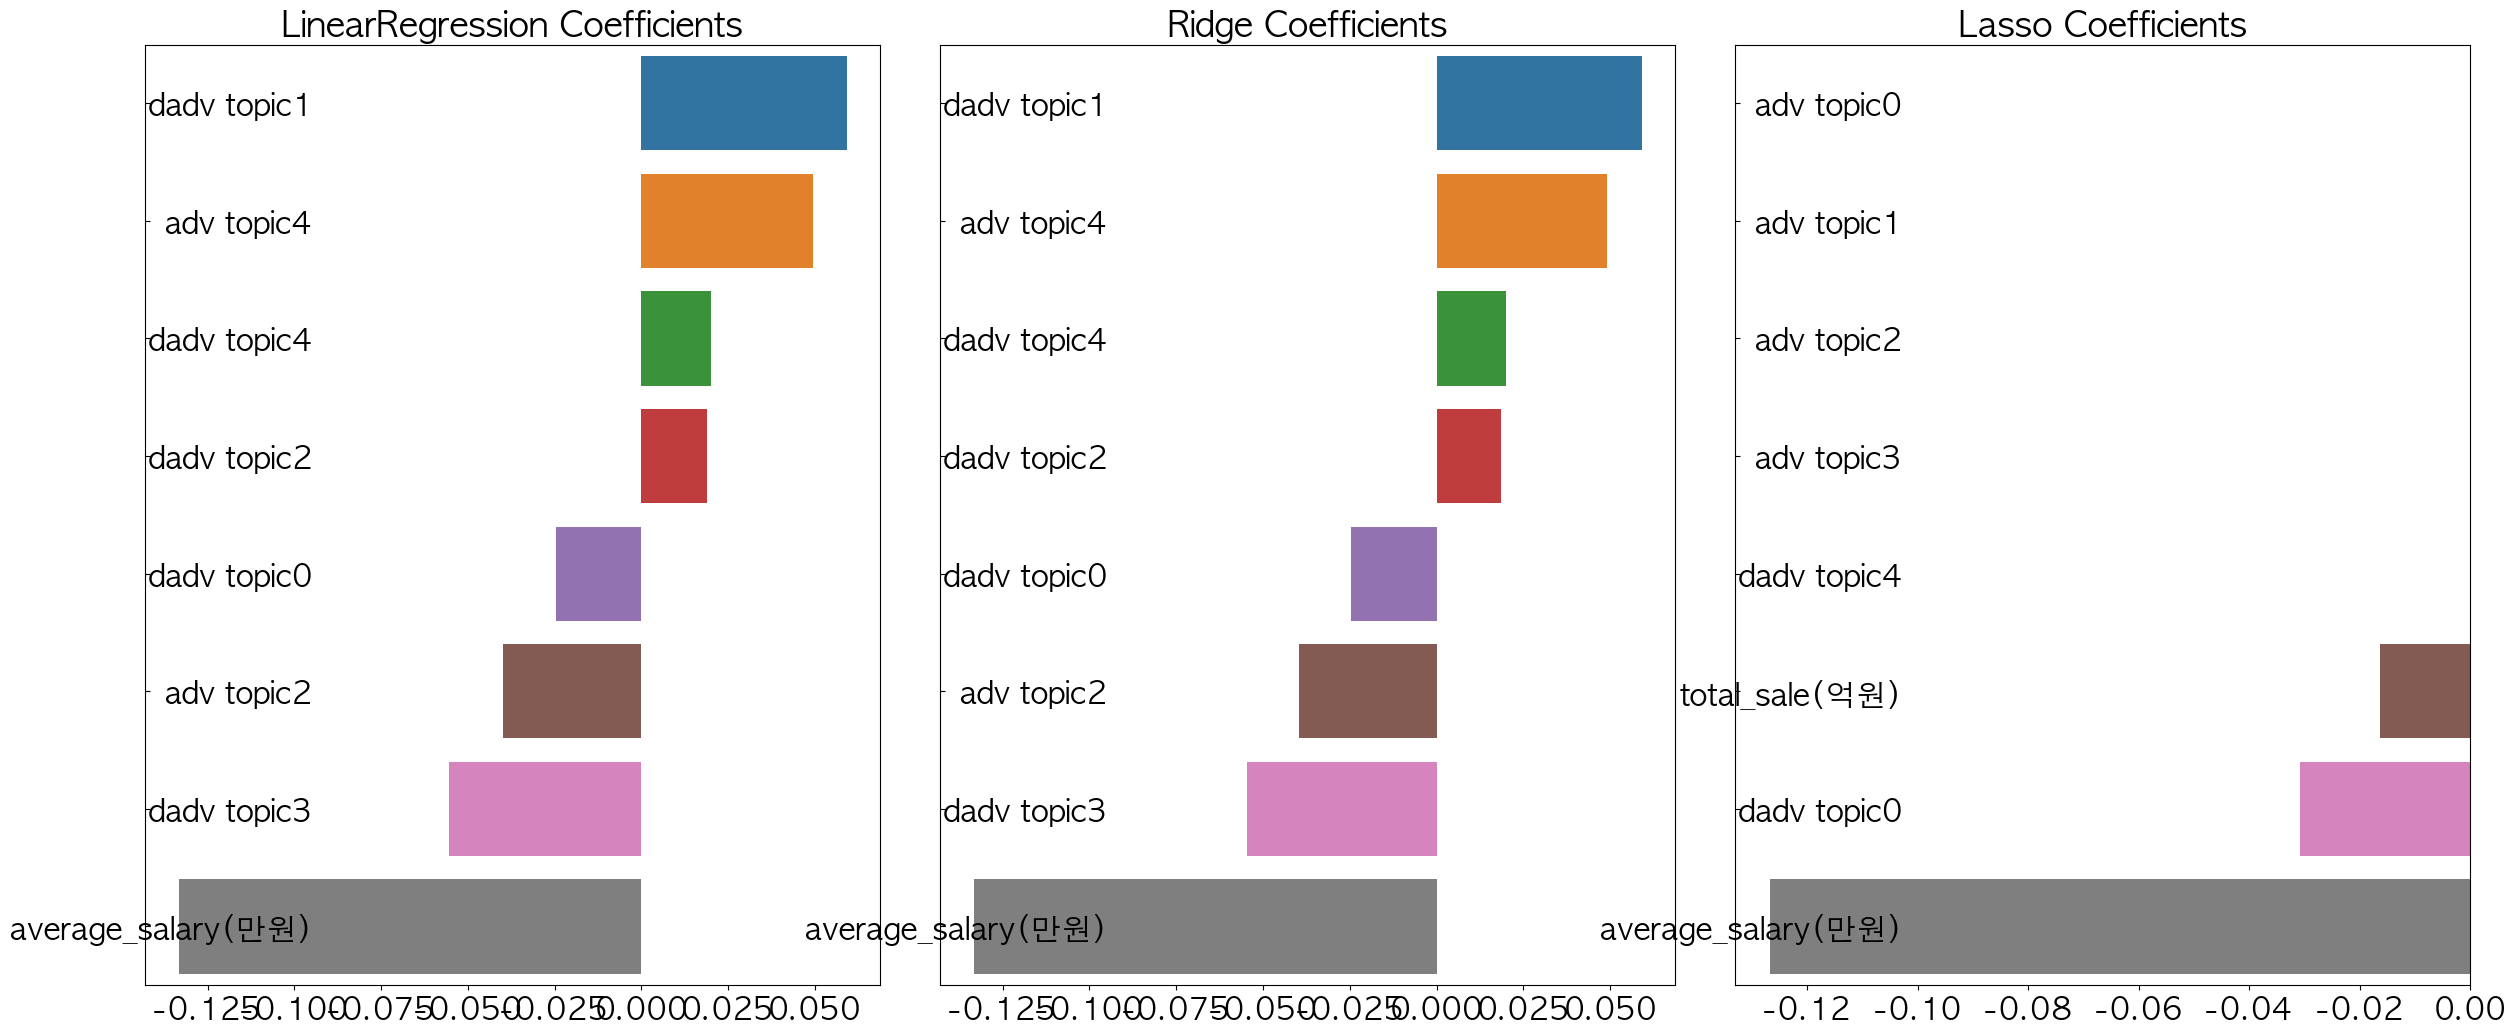

In [24]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=0.05)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
print('\n')
get_maes(models)

visualize_coefficient(models)

Decision Tree with Regression

xgbooost

In [25]:
from xgboost import XGBRegressor 

xgb_params = {'n_estimators': [500, 750, 1000], 
              'learning_rate': [0.05, 0.1, 0.15, 0.2], 
              'max_depth' : [4,6,8,10]}
xgb_reg = XGBRegressor(n_estimators = 1000, learning_rate = 0.05, colsample_bytree = 0.5, subsample = 0.8)

xgb_best_params = save_best_params(xgb_reg, xgb_params)

print(xgb_best_params)

XGBRegressor After 5 CV, best average MSE: 0.0147, best average RMSE: 0.1211, best alpha: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}


{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}


In [26]:
# work after best params
xgb_reg = XGBRegressor(n_estimators = 500, learning_rate = 0.05, max_depth = 4, colsample_bytree = 0.5, subsample = 0.8)
xgb_reg.fit(X_train.astype(float),y_train.astype(float))

get_mae(xgb_reg)
get_rmse(xgb_reg)

XGBRegressor  MAE:  0.091
XGBRegressor  RMSE:  0.117


0.11745714354700303

light gbm

In [27]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators': [500, 750, 1000], 
              'learning_rate': [0.05, 0.1, 0.15, 0.2], 
              'num_leaves' : [4, 6, 8, 10]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate= 0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
lgbm_best_params = save_best_params(lgbm_reg,lgbm_params)

print(lgbm_best_params)

LGBMRegressor After 5 CV, best average MSE: 0.0137, best average RMSE: 0.1171, best alpha: {'learning_rate': 0.05, 'n_estimators': 500, 'num_leaves': 4}


{'learning_rate': 0.05, 'n_estimators': 500, 'num_leaves': 4}


In [28]:
# work after best params
lgbm_reg = LGBMRegressor(n_estimators=500, learning_rate= 0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
lgbm_reg.fit(X_train.astype(float),y_train.astype(float))

get_mae(lgbm_reg)
get_rmse(lgbm_reg)

LGBMRegressor  MAE:  0.088
LGBMRegressor  RMSE:  0.115


0.11502078341947607

gradient boosting

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gb_params = {'n_estimators': [500, 750, 1000], 
              'learning_rate': [0.05, 0.1, 0.15, 0.2], 
              'max_depth' : [4,6,8,10]}
gb_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate= 0.05, subsample=0.6 )
gb_best_params = save_best_params(gb_reg,gb_params)

print(gb_best_params)

GradientBoostingRegressor After 5 CV, best average MSE: 0.0149, best average RMSE: 0.1221, best alpha: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 1000}


{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 1000}


In [30]:
# work after best params
gb_reg = GradientBoostingRegressor(n_estimators=750, learning_rate= 0.05, subsample=0.6, max_depth=10 )
gb_reg.fit(X_train.astype(float),y_train.astype(float))

get_mae(gb_reg)
get_rmse(gb_reg)

GradientBoostingRegressor  MAE:  0.094
GradientBoostingRegressor  RMSE:  0.121


0.12136061309726921

random forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_params = {'n_estimators': [500, 750, 1000],
             'max_depth' : [4,6,8,10]}
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_best_params = save_best_params(rf_reg,rf_params)

print(rf_best_params)

RandomForestRegressor After 5 CV, best average MSE: 0.0132, best average RMSE: 0.1151, best alpha: {'max_depth': 4, 'n_estimators': 1000}


{'max_depth': 4, 'n_estimators': 1000}


In [32]:
# work after best params

rf_reg = RandomForestRegressor(n_estimators=500)
rf_reg.fit(X_train,y_train)

get_mae(rf_reg)
get_rmse(rf_reg)

RandomForestRegressor  MAE:  0.09
RandomForestRegressor  RMSE:  0.116


0.11602539290765528

In [33]:
from sklearn.tree import DecisionTreeRegressor

dt_params = {'max_depth' : [4,6,8,10]}
dt_reg = DecisionTreeRegressor(max_depth=4)
dt_best_params = save_best_params(dt_reg, dt_params)

print(dt_best_params)

DecisionTreeRegressor After 5 CV, best average MSE: 0.0143, best average RMSE: 0.1195, best alpha: {'max_depth': 4}


{'max_depth': 4}


In [34]:
# work after best params

dt_reg = DecisionTreeRegressor(max_depth=4)
dt_reg.fit(X_train,y_train)

get_mae(dt_reg)
get_rmse(dt_reg)

DecisionTreeRegressor  MAE:  0.086
DecisionTreeRegressor  RMSE:  0.111


0.1111574792892128

<Axes: >

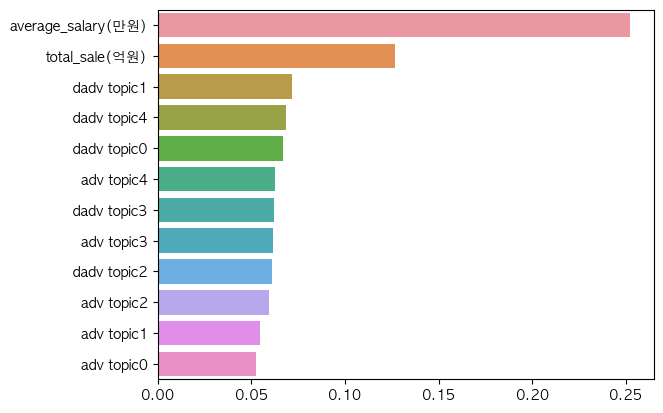

In [35]:
# Feature graph xgb
xgb_reg.fit(x_data.astype(float), y_target.astype(float))

feature_series = pd.Series(data = xgb_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)

<Axes: >

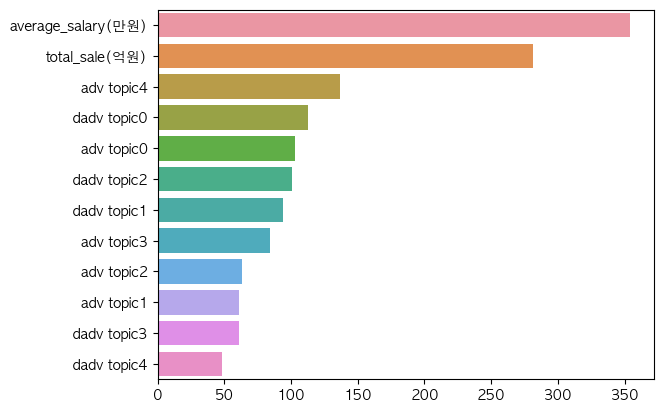

In [36]:
# Feature Graph lgbm
lgbm_reg.fit(x_data.astype('float'), y_target.astype('float'))

feature_series = pd.Series(data = lgbm_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)


<Axes: >

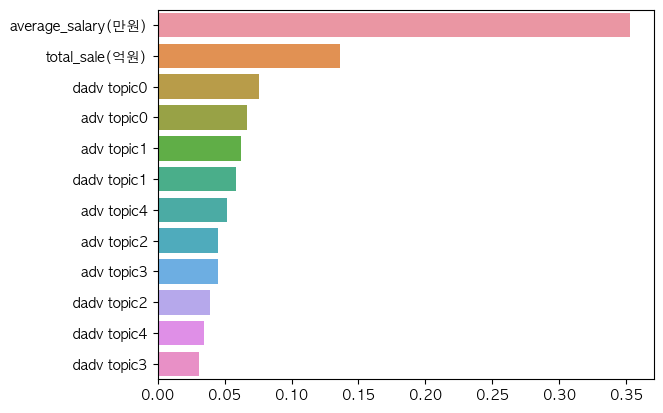

In [37]:
# Feature graph gradient boosting

gb_reg.fit(x_data.astype('float'), y_target.astype('float'))

feature_series = pd.Series(data = gb_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)

<Axes: >

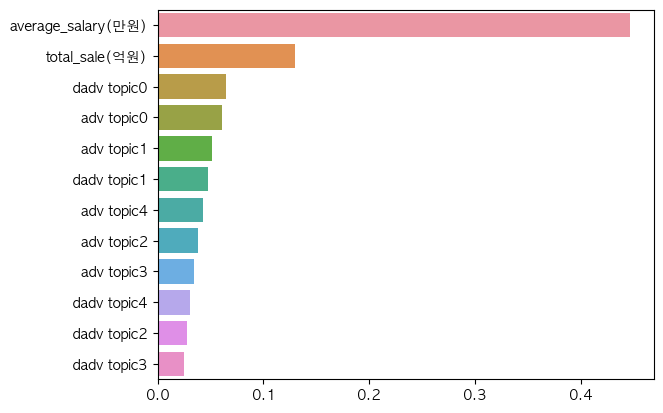

In [38]:
# Feature graph randomforest

rf_reg.fit(x_data.astype('float'), y_target.astype('float'))

feature_series = pd.Series(data = rf_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)


<Axes: >

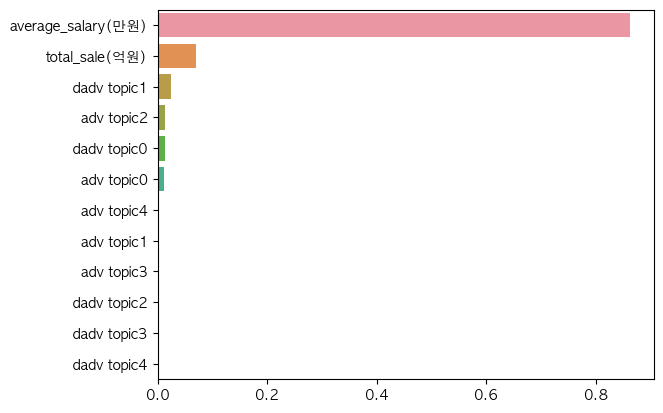

In [39]:
# Feature Graph DecisionTree
dt_reg.fit(x_data.astype('float'), y_target.astype('float'))

feature_series = pd.Series(data = dt_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)

Export Trained Model

In [40]:
import pickle
import joblib

# joblib.dump(lgbm_reg,"tp_lgbm_reg_model.pkl")
joblib.dump(xgb_reg,"tp_xgb_reg_model.pkl")

['tp_xgb_reg_model.pkl']